Data Imports


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

compact_result_season = pd.read_csv('./data/RegularSeasonCompactResults.csv')


In [4]:
compact_result_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [5]:
compact_result_season.Season.describe()

count    150684.000000
mean       2002.127107
std           9.508740
min        1985.000000
25%        1994.000000
50%        2003.000000
75%        2010.000000
max        2017.000000
Name: Season, dtype: float64

In [6]:
#import the file with team IDs
team_ids = pd.read_csv('./data/Teams.csv')
team_ids.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


Groupby command to pull up wins

In [30]:
train, test = train_test_split(compact_result_season, test_size=.2)

In [31]:
train.size

964376

In [32]:
test.size

241096

In [33]:
wins_mat = train.groupby('WTeamID').size().to_frame()
loss_mat = train.groupby('LTeamID').size().to_frame()

In [34]:
simplee_prop = (wins_mat)/(wins_mat+loss_mat)

In [35]:
simplee_prop.columns=['Win_prop']

In [36]:
simplee_prop

,Win_prop
WTeamID,
1101,0.256757
1102,0.362445
1103,0.584780
1104,0.633962
1105,0.369393
1106,0.455331
1107,0.489842
1108,0.355102
1109,0.244094


In [37]:
simplee_prop.sort_values('Win_prop', ascending=False)

,Win_prop
WTeamID,
1242,0.814039
1181,0.813174
1246,0.773767
1112,0.755177
1314,0.750903
1393,0.745050
1211,0.727273
1462,0.712329
1424,0.700501


In [38]:
simplee_prop['TeamID'] = simplee_prop.index

In [39]:
merged_with_ids = pd.merge(simplee_prop, team_ids)

In [45]:
sorted_wins =merged_with_ids.sort_values('Win_prop', ascending=False).reset_index()


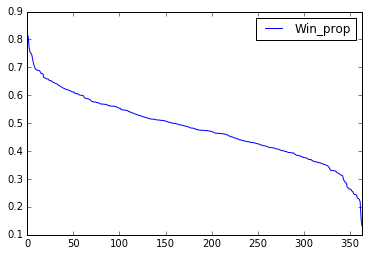

In [41]:
sorted_wins.reset_index().plot(y= 'Win_prop', use_index = True)

In [48]:
simplee_prop.sort_index()

,Win_prop,TeamID
WTeamID,,
1101,0.256757,1101
1102,0.362445,1102
1103,0.584780,1103
1104,0.633962,1104
1105,0.369393,1105
1106,0.455331,1106
1107,0.489842,1107
1108,0.355102,1108
1109,0.244094,1109


In [58]:
def calc_win(row):
    # prop that team_i wins over team_j
    i = row['WTeamID']
    j = row['LTeamID']
    pw_i = float(simplee_prop[simplee_prop['TeamID'] == i]['Win_prop'])
    pw_j = float(simplee_prop[simplee_prop['TeamID'] == j]['Win_prop'])
    return 1. / (1 + (pw_j / pw_i) * (1 - pw_i)/(1 - pw_j))

    

In [57]:
float(simplee_prop[simplee_prop['TeamID'] == 1238]['Win_prop'])

0.45066666666666666

In [61]:
test['win_prob'] = test.apply(calc_win, axis=1)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


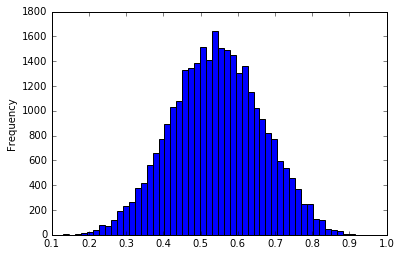

In [66]:
test['win_prob'].plot.hist(bins=50)

In [108]:
test['win_prob'].describe()

count    30137.000000
mean         0.543113
std          0.121212
min          0.131677
25%          0.460003
50%          0.543474
75%          0.626718
max          0.929967
Name: win_prob, dtype: float64

In [71]:
test.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,win_prob
45987,1996,84,1238,56,1212,54,A,0,0.665244
53705,1998,69,1116,62,1261,59,H,0,0.569717
103743,2009,28,1149,62,1219,52,A,0,0.424961
86574,2005,100,1247,76,1350,68,A,0,0.407412
10582,1987,110,1281,69,1329,68,A,0,0.495948


In [91]:
named_test = pd.merge(test, team_ids[['TeamID', 'TeamName']], left_on='WTeamID', right_on='TeamID')

In [92]:
named_test.columns = [u'Season', u'DayNum', u'WTeamID', u'WScore', u'LTeamID', u'LScore',
       u'WLoc', u'NumOT', u'win_prob', u'TeamID', u'WTeamName']

In [93]:
named_test.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,win_prob,TeamID,WTeamName
0,1996,84,1238,56,1212,54,A,0,0.665244,1238,Jackson St
1,2012,45,1238,59,1374,58,N,0,0.420032,1238,Jackson St
2,2016,63,1238,67,1105,66,H,0,0.583424,1238,Jackson St
3,1991,103,1238,94,1108,87,A,0,0.598378,1238,Jackson St
4,2008,61,1238,87,1105,74,H,0,0.583424,1238,Jackson St


In [96]:
named_test = named_test.drop('TeamID', axis=1)

In [99]:
named_test = pd.merge(named_test, team_ids[['TeamID', 'TeamName']], left_on='LTeamID', right_on='TeamID')

In [101]:
named_test.columns = [   u'Season',    u'DayNum',   u'WTeamID',    u'WScore',   u'LTeamID',
          u'LScore',      u'WLoc',     u'NumOT',  u'win_prob', u'WTeamName',
          u'TeamID',  u'LTeamName']

In [104]:
named_test.drop('TeamID', axis=1, inplace=True)

In [106]:
named_test.sort_values('win_prob')

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,win_prob,WTeamName,LTeamName
24499,2015,115,1152,74,1213,70,H,0,0.131677,Chicago St,Grand Canyon
24573,1994,89,1363,92,1424,77,H,0,0.153481,San Jose St,UNLV
24572,2017,103,1363,76,1424,74,A,0,0.153481,San Jose St,UNLV
18510,2007,60,1146,50,1137,48,N,0,0.163781,Cent Arkansas,Bucknell
26672,1993,89,1339,65,1211,63,H,0,0.173140,Portland,Gonzaga
26671,1985,102,1339,59,1211,58,H,0,0.173140,Portland,Gonzaga
26669,1996,126,1339,76,1211,68,N,0,0.173140,Portland,Gonzaga
26670,1985,129,1339,56,1211,54,A,0,0.173140,Portland,Gonzaga
27451,2009,82,1154,72,1158,63,H,0,0.174483,Citadel,Col Charleston
15223,1999,103,1404,74,1293,73,H,0,0.178413,TN Martin,Murray St


In [110]:
compact_result_season[(compact_result_season['WTeamID'] == 1107) & (compact_result_season['Season'] == 2014)]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
129206,2014,4,1107,74,1373,62,A,0
129396,2014,8,1107,71,1312,65,H,0
130029,2014,22,1107,70,1351,59,A,0
130287,2014,27,1107,66,1312,55,A,0
130590,2014,36,1107,74,1135,68,A,0
130869,2014,46,1107,70,1463,62,H,0
131327,2014,61,1107,81,1216,56,H,0
131499,2014,65,1107,73,1420,72,H,2
131952,2014,75,1107,85,1263,78,A,0
132114,2014,77,1107,66,1127,60,H,0


In [111]:
compact_result_season[(compact_result_season['LTeamID'] == 1107) & (compact_result_season['Season'] == 2014)]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
129605,2014,12,1346,79,1107,69,H,0
129755,2014,16,1182,70,1107,59,H,0
129881,2014,19,1137,77,1107,64,A,0
130393,2014,30,1221,62,1107,57,H,0
130651,2014,40,1159,69,1107,60,A,0
131030,2014,49,1179,71,1107,63,H,0
131223,2014,57,1338,58,1107,46,H,0
131752,2014,68,1436,68,1107,38,H,0
131843,2014,72,1262,70,1107,66,H,1
132243,2014,80,1306,60,1107,56,H,0


In [114]:
conference_df = pd.read_csv('./data/TeamConferences.csv')

In [123]:
conference_df.head()

,Season,TeamID,ConfAbbrev
0,1985,1114,a_sun
1,1985,1147,a_sun
2,1985,1204,a_sun
3,1985,1209,a_sun
4,1985,1215,a_sun


In [121]:
conference_df['ConfAbbrev'].unique()

array(['a_sun', 'a_ten', 'acc', 'big_east', 'big_eight', 'big_sky',
       'big_ten', 'ecacm', 'ecacn', 'ecacs', 'ecc', 'gsc', 'ind', 'ivy',
       'maac', 'mac', 'meac', 'metro', 'mid_cont', 'mvc', 'mw_city', 'ovc',
       'pac_ten', 'pcaa', 'sec', 'southern', 'southland', 'sun_belt',
       'swac', 'swc', 'wac', 'wcc', 'big_south', 'caa', 'mw_coll', 'asc',
       'big_west', 'nac', 'nec', 'patriot', 'gmwc', 'awc', 'cusa', 'aec',
       'big_twelve', 'mwc', 'horizon', 'summit', 'gwc', 'pac_twelve', 'aac'], dtype=object)

In [128]:
compact_result_season['WConf'] = pd.merge(compact_result_season, conference_df, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])['ConfAbbrev']

In [131]:
compact_result_season['LConf'] = pd.merge(compact_result_season, conference_df, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'])['ConfAbbrev']

In [134]:
compact_result_season[compact_result_season['WConf'] == compact_result_season['LConf']].count()

Season     3550
DayNum     3550
WTeamID    3550
WScore     3550
LTeamID    3550
LScore     3550
WLoc       3550
NumOT      3550
WConf      3550
LConf      3550
dtype: int64

In [153]:
conference_df.head()

,Season,TeamID,ConfAbbrev
0,1985,1114,a_sun
1,1985,1147,a_sun
2,1985,1204,a_sun
3,1985,1209,a_sun
4,1985,1215,a_sun


In [155]:
compact_result_season = pd.merge(compact_result_season, conference_df, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])

In [158]:
compact_result_season.columns = [u'Season', u'DayNum', u'WTeamID', u'WScore', u'LTeamID', u'LScore',
       u'WLoc', u'NumOT', u'TeamID', u'WConf']

In [161]:
compact_result_season.drop('TeamID', axis=1, inplace=True)

In [165]:
compact_result_season = pd.merge(compact_result_season, conference_df, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'])

In [166]:
compact_result_season.drop('TeamID', axis=1, inplace=True)

In [169]:
compact_result_season.columns = [    u'Season',     u'DayNum',    u'WTeamID',     u'WScore',
          u'LTeamID',     u'LScore',       u'WLoc',      u'NumOT',
            u'WConf', u'LConf']

In [190]:
PPG_season_W_mean = compact_result_season.groupby(['WTeamID', 'Season'])['WScore'].mean().to_frame()

In [191]:
PPG_season_W_mean.reset_index(inplace=True)

In [192]:
PPG_season_W_mean.columns = [u'WTeamID', u'Season', u'season_mean_WScore']

In [193]:
compact_result_season = pd.merge(compact_result_season, PPG_season_W_mean)

In [195]:
PPG_season_L_mean = compact_result_season.groupby(['LTeamID', 'Season'])['LScore'].mean().to_frame()

In [197]:
PPG_season_L_mean.reset_index(inplace=True)
PPG_season_L_mean.columns = [u'LTeamID', u'Season', u'season_mean_LScore']

In [199]:
pd.merge(compact_result_season, PPG_season_L_mean)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WConf,LConf,season_mean_WScore,season_mean_LScore
0,1985,20,1228,81,1328,64,N,0,big_ten,big_eight,73.217391,75.000000
1,1985,33,1228,73,1328,70,H,0,big_ten,big_eight,73.217391,75.000000
2,1985,118,1242,82,1328,76,H,0,big_eight,big_eight,78.652174,75.000000
3,1985,54,1374,85,1328,76,N,0,swc,big_eight,78.772727,75.000000
4,1985,72,1409,104,1328,89,H,0,mvc,big_eight,82.136364,75.000000
5,1985,25,1228,64,1226,44,N,0,big_ten,big_sky,73.217391,67.111111
6,1985,75,1305,102,1226,82,H,0,big_sky,big_sky,82.210526,67.111111
7,1985,102,1305,100,1226,92,A,0,big_sky,big_sky,82.210526,67.111111
8,1985,129,1305,79,1226,63,N,0,big_sky,big_sky,82.210526,67.111111
9,1985,68,1211,65,1226,60,H,0,wcc,big_sky,61.166667,67.111111


In [174]:
compact_result_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WConf,LConf
0,1985,20,1228,81,1328,64,N,0,big_ten,big_eight
1,1985,33,1228,73,1328,70,H,0,big_ten,big_eight
2,1985,118,1242,82,1328,76,H,0,big_eight,big_eight
3,1985,54,1374,85,1328,76,N,0,swc,big_eight
4,1985,72,1409,104,1328,89,H,0,mvc,big_eight
